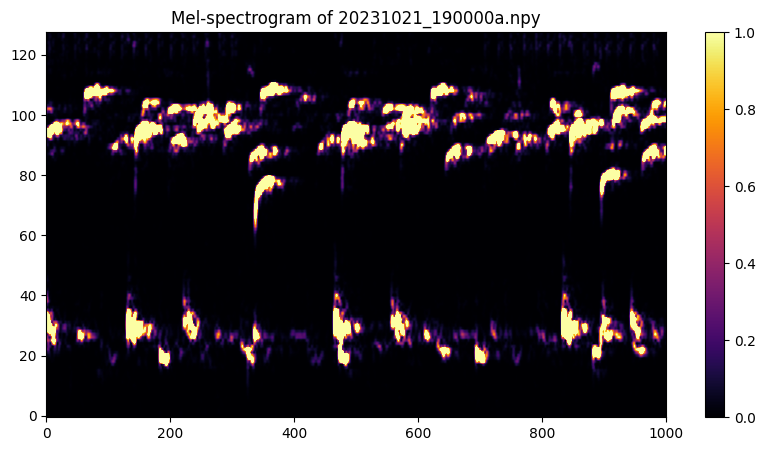

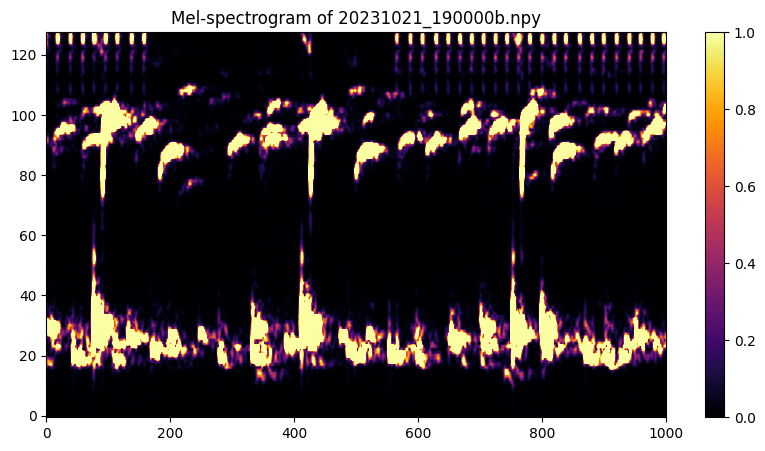

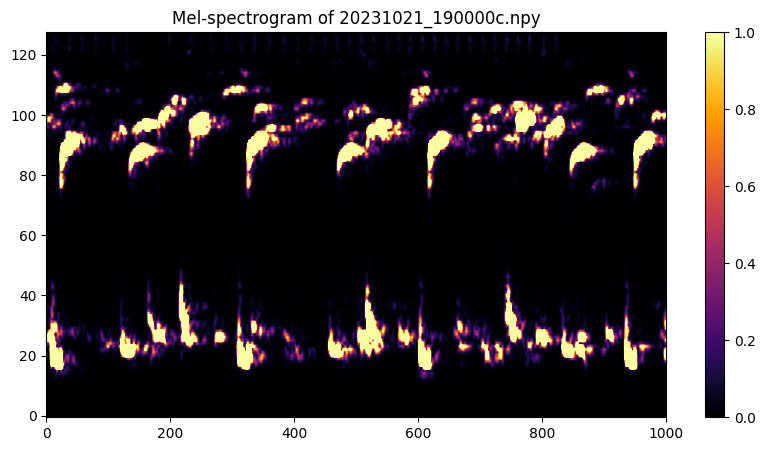

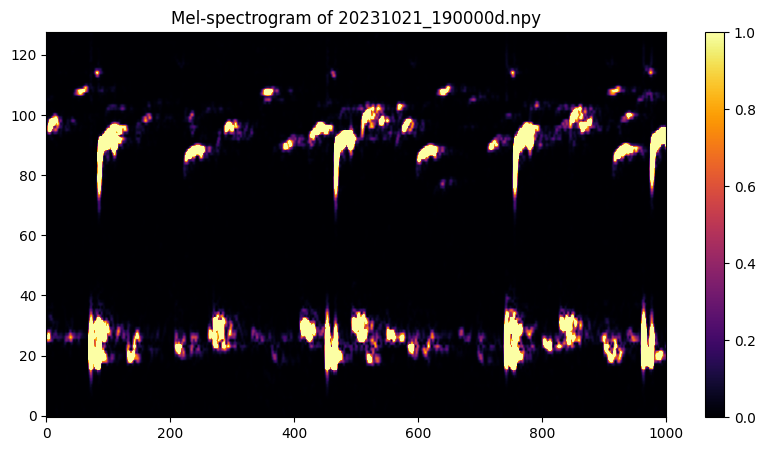

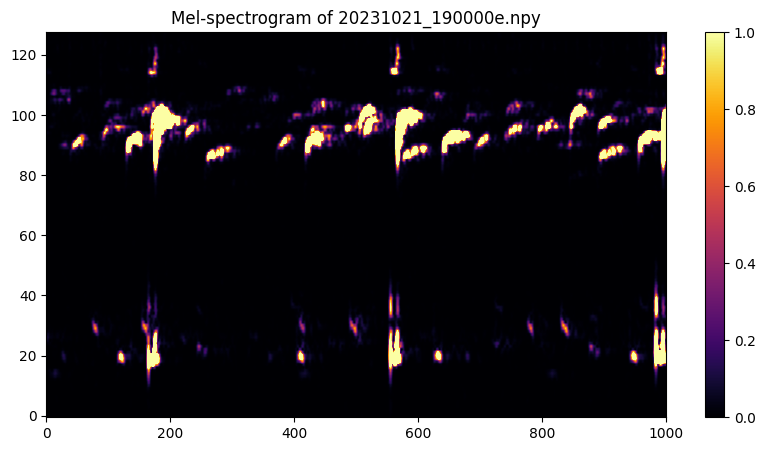

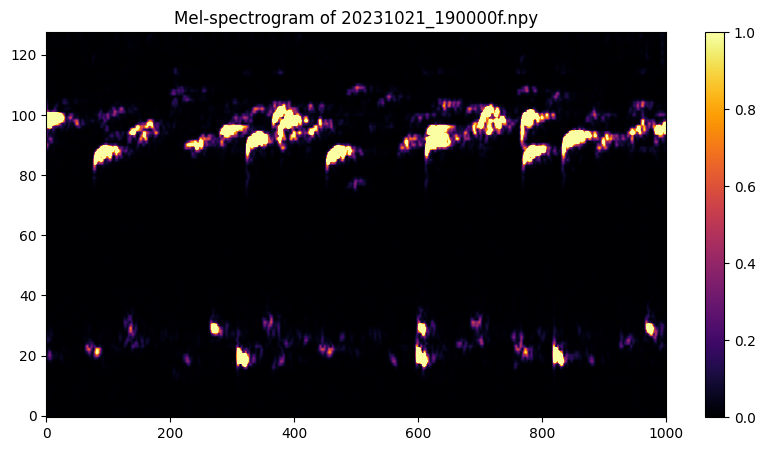

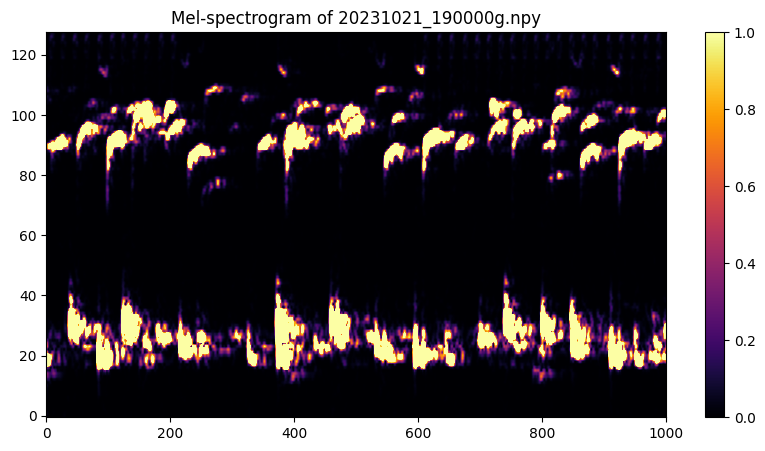

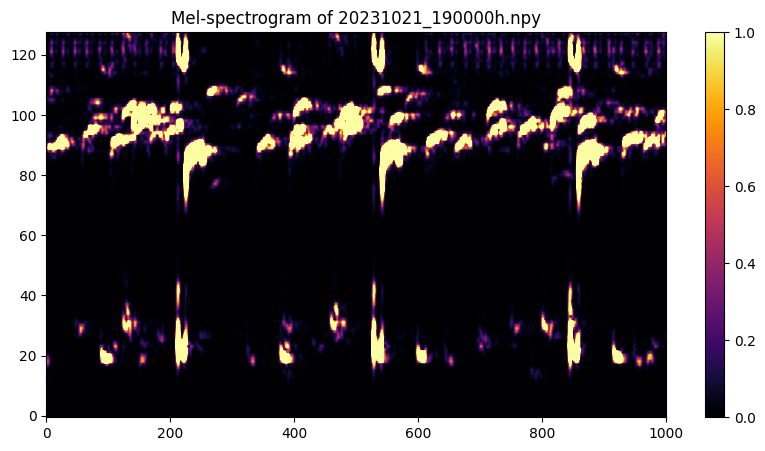

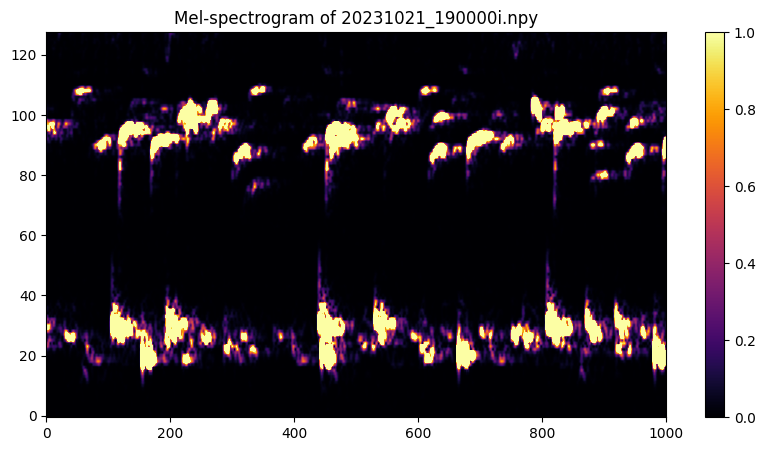

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Listar todos los archivos .npy en la carpeta data/alineados
archivos = [f for f in os.listdir('../data/not_aligned/all') if f.endswith('.npy')]

# Para cada archivo en la carpeta
for archivo in archivos:
    # Cargar los datos del archivo .npy
    datos = np.load(os.path.join('../data/not_aligned/all', archivo))

    # Crear una figura y un eje para la gráfica
    fig, ax = plt.subplots(figsize=(10, 5))

    # Graficar el mel-espectrograma
    cax = ax.imshow(datos, aspect='auto', cmap='inferno', origin='lower')

    # Ajustar la escala de colores
    cax.set_clim(vmin=0, vmax=1)

    # Agregar una barra de colores
    fig.colorbar(cax)

    # Agregar el nombre del archivo al título de la gráfica
    ax.set_title(f"Mel-spectrogram of {archivo}")

    ax.set_xlim([0, 1000])

    # Mostrar la gráfica
    plt.show()

In [9]:
base_path = "/media/danielhp/DATA/Escuela/C. Computación/Investigación/Colin-Sequence/data/not_aligned/audios"
offset = 10  # Start reading after 10 seconds
duration = 5*60  # Read next 5 minutes
hop_length, n_fft, n_mels = 512, 6096, 128
f_min, f_max = 1600, 4096

In [10]:
import librosa
import librosa.display

frogs = []
for file_name in os.listdir(base_path):
    y, sr = librosa.load(os.path.join(base_path, file_name), sr=None, offset=offset, duration=duration)
    print(file_name, sr)
    frogs.append(dict(file_name=file_name, data=y))

20231021_190000a.WAV 96000
20231021_190000b.WAV 96000
20231021_190000c.WAV 96000
20231021_190000d.WAV 96000
20231021_190000e.WAV 96000
20231021_190000f.WAV 96000
20231021_190000g.WAV 96000
20231021_190000h.WAV 96000
20231021_190000i.WAV 96000


In [5]:
for frog in frogs:
    print('Processing frog ', frog['file_name'])
    xs = librosa.feature.melspectrogram(y=frog['data'], sr=sr, 
                                   n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, 
                                    fmin=f_min, fmax=f_max)
    energy = np.sum(xs ** 2, axis=0)
    xs_db = librosa.amplitude_to_db(xs, ref=np.max)
    frog.update(dict(xs=xs, xs_db=xs_db, energy=energy))

Processing frog  20231021_190000a.WAV
Processing frog  20231021_190000b.WAV
Processing frog  20231021_190000c.WAV
Processing frog  20231021_190000d.WAV
Processing frog  20231021_190000e.WAV
Processing frog  20231021_190000f.WAV
Processing frog  20231021_190000g.WAV
Processing frog  20231021_190000h.WAV
Processing frog  20231021_190000i.WAV


In [6]:
def show_sel_espect_data(frog, ini_time, delta_time, to_show_spec='xs_db', to_show_energy='energy'):
    ini_idx = int(ini_time*sr/hop_length)
    show_width = int(delta_time*sr/hop_length)
    plt.figure(figsize=(10, 4))
    plt.title(frog['file_name'])
    data = frog[to_show_spec][:, ini_idx: ini_idx+show_width]
    librosa.display.specshow(data, sr=sr, x_axis='time', y_axis='mel', fmin=f_min, fmax=f_max)
    energy = frog[to_show_energy][ini_idx: ini_idx+show_width]
    times = librosa.frames_to_time(np.arange(energy.shape[0]), sr=sr)
    ax2 = plt.gca().twinx()
    ax2.plot(times, energy, color='white', alpha=0.3)    
    plt.show()

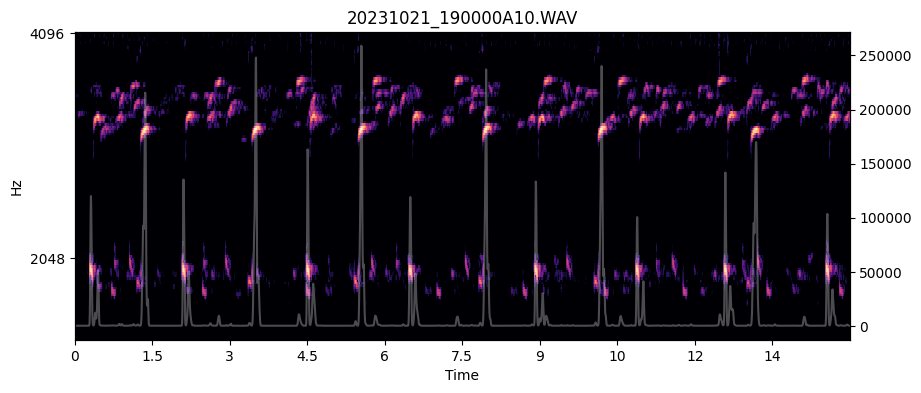

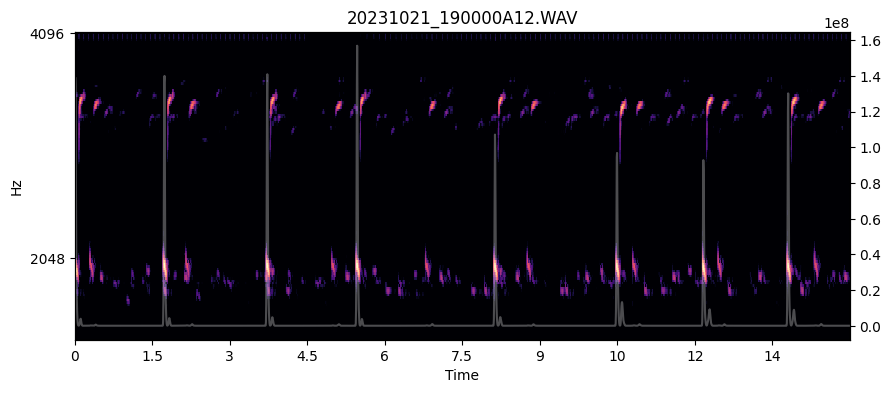

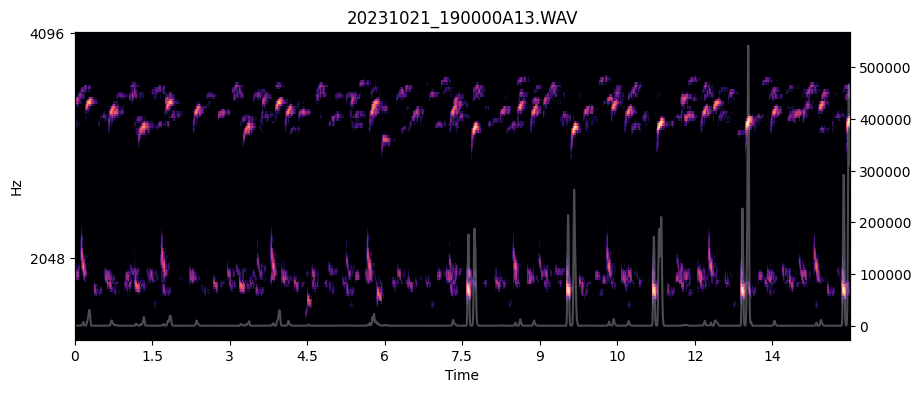

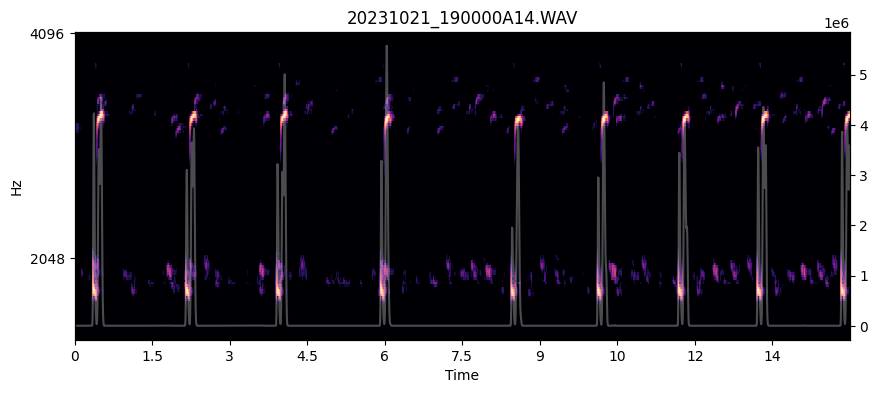

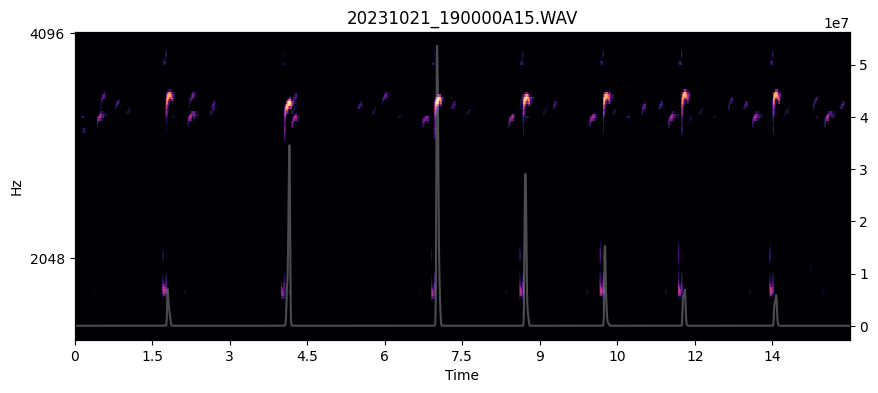

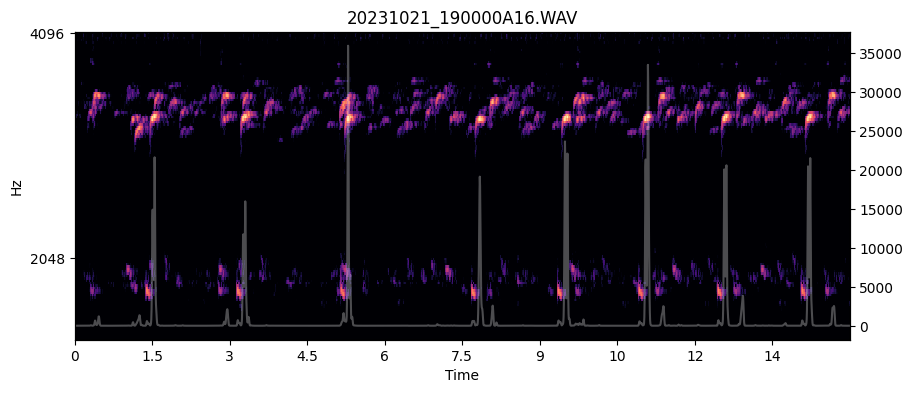

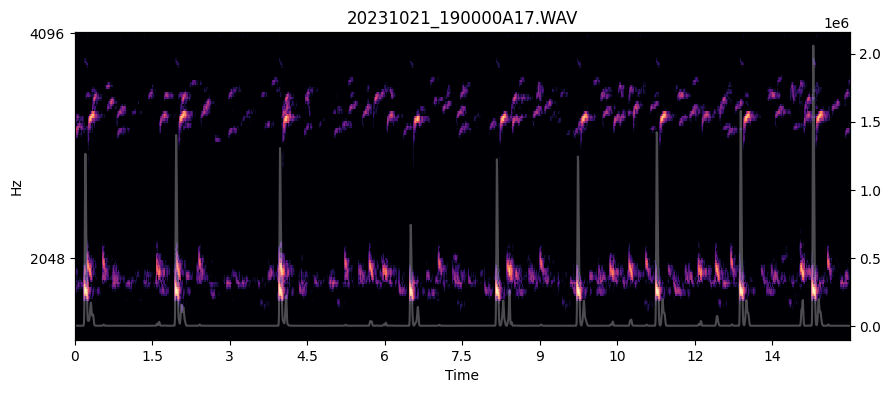

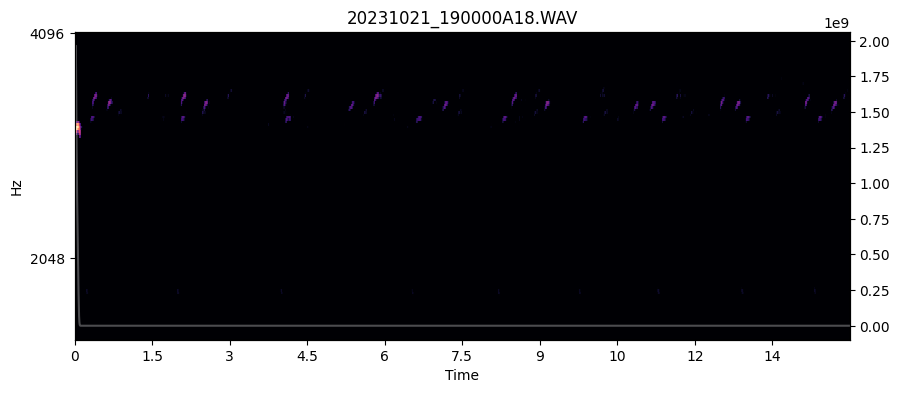

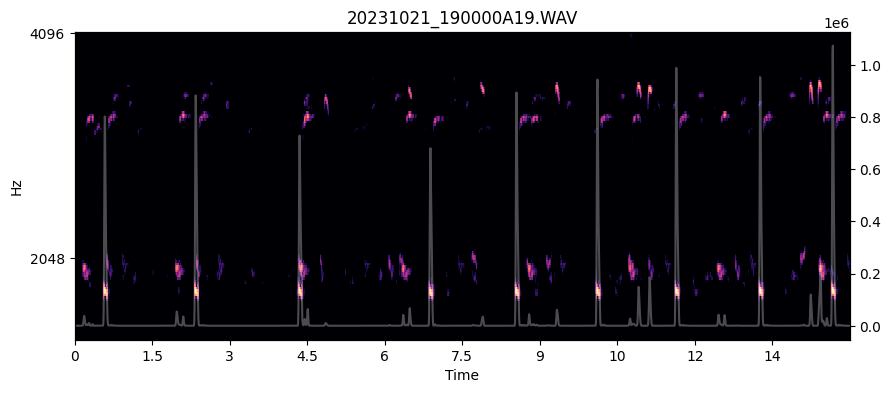

In [7]:
for i in range(len(frogs)):
    show_sel_espect_data(frogs[i], 50, 15)